#EIGEN CENTRALITY

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

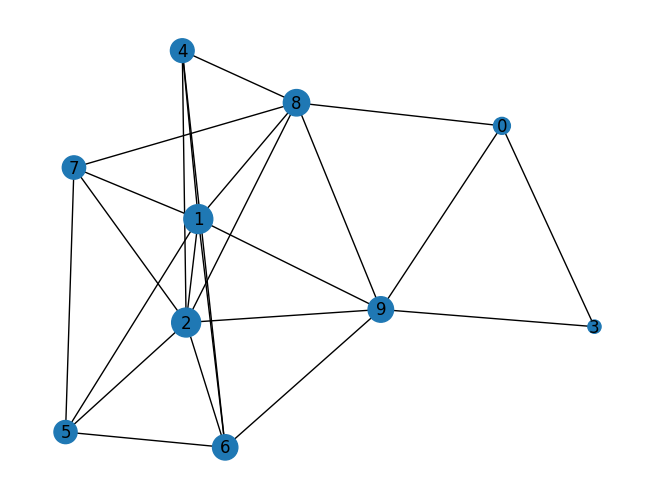

0: 0.14751518780826156
1: 0.4331917650921314
2: 0.4331917650921314
3: 0.09066507947753519
4: 0.29193551945308643
5: 0.2771971455846237
6: 0.3319048196813011
7: 0.2816887012909591
8: 0.3603760553372839
9: 0.33654726559611375


In [ ]:
G = nx.gnp_random_graph(10, 0.5)

ec = nx.eigenvector_centrality(G)

node_size = [ec[n]*1000 for n in G.nodes()]
nx.draw(G, with_labels = True, node_size = node_size)
plt.show()

for node, ec in ec.items():
  print(f"{node}: {ec}" )

#Contoh case: Menganalisis Tim yang Berpengaruh dalam Musim Pertandingan Bola

In [ ]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('hasil-tanding.xlsx')
df

,HomeTeam,AwayTeam,hscore,ascore
0,Arsenal,Everton,7,1
1,MiddlesBrough,Arsenal,2,7
2,Manchester City,Arsenal,3,7
3,Arsenal,Porthsmouth,7,4
4,Manchester United,Arsenal,5,7
5,Arsenal,Manchester United,7,6


In [ ]:
#Membuat graf berbentuk directed graph

G = nx.DiGraph()
for index, row in df.iterrows():
  home_team = row['HomeTeam']
  away_team = row['AwayTeam']
  home_score = row['hscore']
  away_score = row['ascore']
  G.add_edge(home_team, away_team, weight=home_score-away_score)

weight = home_score-away_score

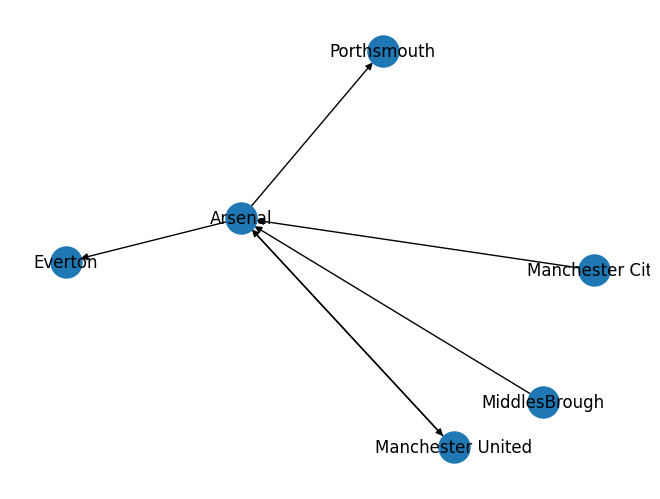

In [ ]:
nx.draw(G, with_labels = True, node_size = 500)
plt.show()

In [ ]:
ec = nx.eigenvector_centrality(G, weight = weight, max_iter=1000)

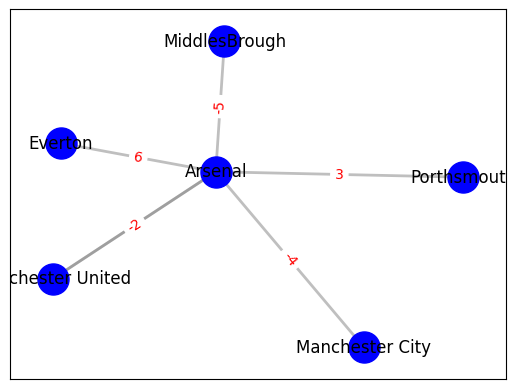

In [ ]:
node_size = [ec[n]*5000 for n in G.nodes()]
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='blue')
nx.draw_networkx_labels(G, pos)
edges = nx.draw_networkx_edges(G, pos, width=2, edge_color= 'gray', alpha = 0.5, arrows=False)
weights = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=weights, font_size=10, font_color='red')
plt.axis('on')
plt.show()

In [ ]:
#Menghitung degree in dan degree out setiap node
degree_in = dict(G.in_degree())
degree_out = dict(G.out_degree())

#Mencetak degree in, degree out, dan centrality setiap node
for node in G.nodes():
  print("Node:", node)
  print("Degree Out:", degree_in[node])
  print("Degree In:", degree_out[node])
  print("Centrality:", abs(ec[node]))
  print()

Node: Arsenal
Degree Out: 3
Degree In: 3
Centrality: 0.5000014305144305

Node: Everton
Degree Out: 1
Degree In: 0
Centrality: 0.4999995231603407

Node: MiddlesBrough
Degree Out: 0
Degree In: 1
Centrality: 9.536770448959932e-07

Node: Manchester City
Degree Out: 0
Degree In: 1
Centrality: 9.536770448959932e-07

Node: Porthsmouth
Degree Out: 1
Degree In: 0
Centrality: 0.4999995231603407

Node: Manchester United
Degree Out: 1
Degree In: 1
Centrality: 0.4999995231603407



In [ ]:
#Mencetak aktor paling berpengaruh berdasarkan eigen centrality
most_influential_player = max(ec, key=ec.get)
print("Tim paling berpengaruh berdasarkan riwayat hasil pertandingan dan skornya adalah:", most_influential_player)

Tim paling berpengaruh berdasarkan riwayat hasil pertandingan dan skornya adalah: Arsenal


#Penerapan Page Rank

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

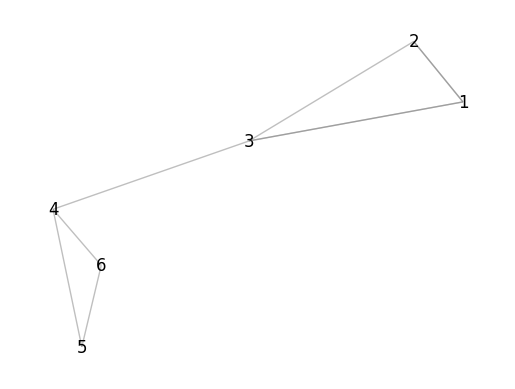

In [ ]:
G = nx.DiGraph()

G.add_nodes_from([1,2,3,4,5,6])

G.add_edges_from([(1,2), [1,3], (2,1), (2,3), (3,1), (3,4), (4,5), (5,6), (6,4)])

pr = nx.pagerank(G, alpha = 0.85)

node_size = [pr[n]*5000 for n in G.nodes()]
pos = nx.spring_layout(G)
nx.draw_networkx_labels(G, pos)
edges = nx.draw_networkx_edges(G, pos, width=1, edge_color='gray', alpha= 0.5, arrows=False)
plt.axis('off')
plt.show()

In [ ]:
#Mencetak PageRank setiap Node
for node in G.nodes():
  print("Node:", node)
  print("PageRank:", pr[node])
  print()

#mencetak node dengan pagerank tertinggi
highest_pagerank_node = max(pr, key=pr.get)
print("Node dengan PageRAnk tertinggi adalah:", highest_pagerank_node)

Node: 1
PageRank: 0.09033280508350813

Node: 2
PageRank: 0.06339144216284458

Node: 3
PageRank: 0.09033280508350813

Node: 4
PageRank: 0.2661597540239845

Node: 5
PageRank: 0.2512333029013056

Node: 6
PageRank: 0.23854989074484897

Node dengan PageRAnk tertinggi adalah: 4
